# Ejemplo Pre-procesamiento de imagenes: 
## Tratamiento de señales 3-Virtual UdeA
### Paula Andrea Pérez Toro

In [1]:
#Librerias
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

#### Leer imagenes: puedes leerlas de diferentes formas, te resultara una matriz de 3 dimensiones, donde la ultima dimension se refier al nùmero de canales (3)

In [2]:
data='benFace.jpg'

In [3]:
imgCV=cv2.imread(data, cv2.IMREAD_UNCHANGED) 
imgPIL=Image.open(data)
imgMATPLOT=mpimg.imread(data)
print(imgMATPLOT.shape,imgCV.shape)

(260, 460, 3) (260, 460, 3)


#### Las imagenes tienes tres canales, RGB= (Red, Green, Blue)

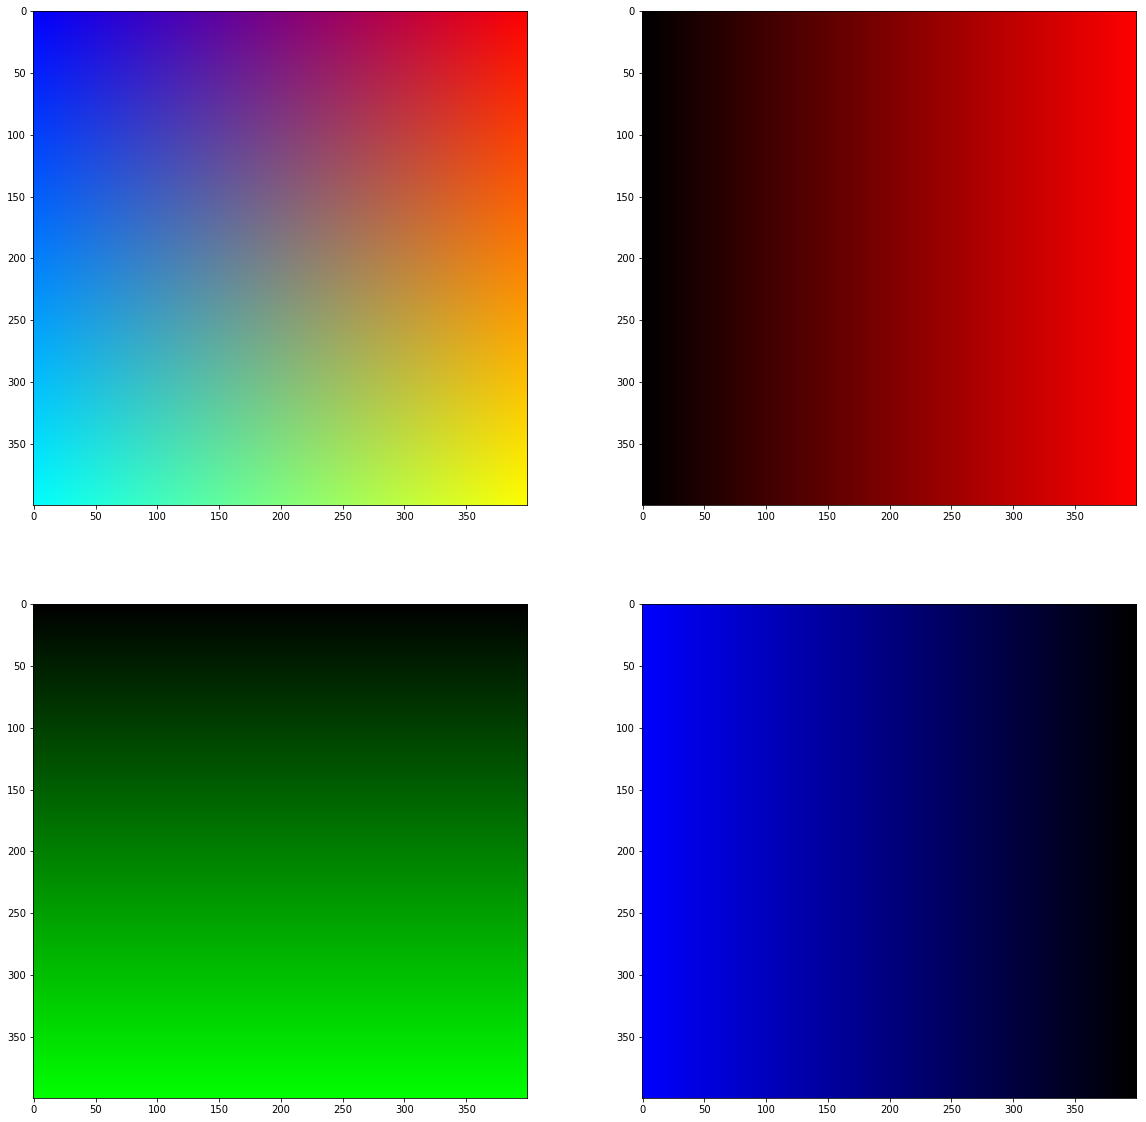

In [4]:
resolution=400

rgb_img = np.zeros([resolution, resolution,3])

r = np.vstack(np.arange(0.0, 1.0, 1/resolution)).T
g = np.vstack(np.arange(0.0, 1.0, 1/resolution))
b = np.arange(0.0, 1.0, 1/resolution)[::-1]

rgb_img[:,:,0] = r
rgb_img[:,:,1] = g
rgb_img[:,:,2] = b


plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(rgb_img)
plt.subplot(2,2,2)
srojo = rgb_img.copy()
srojo[:,:,1] = 0
srojo[:,:,2] = 0
plt.imshow(srojo)
plt.subplot(2,2,3)
sgr = rgb_img.copy()
sgr[:,:,0] = 0
sgr[:,:,2] = 0
plt.imshow(sgr)
plt.subplot(2,2,4)
sb = rgb_img.copy()
sb[:,:,0] = 0
sb[:,:,1] = 0
plt.imshow(sb)
plt.show()


#### Después del parentesis del RGB, mostraremos la imagén

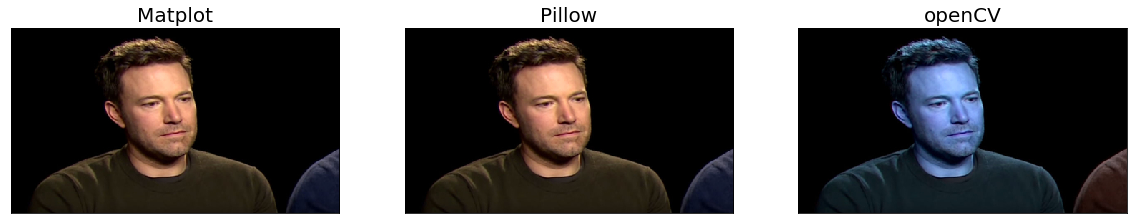

In [5]:

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)

plt.imshow(imgMATPLOT), plt.title('Matplot',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(imgPIL), plt.title('Pillow',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)

plt.imshow(imgCV), plt.title('openCV',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.show()

#### Vamos a rotar imagenes con PILLOW

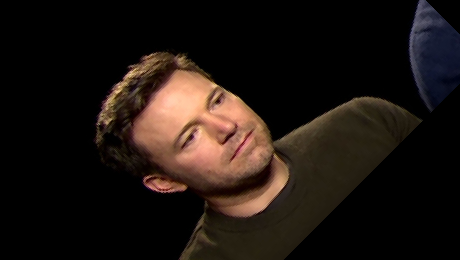

In [6]:
#Image rotate & show
img_rotated=imgPIL.rotate(45)
img_rotated

#### Guardamos la imagen


In [7]:
img_rotated.save('Ben_rotado.jpg')

#### Cambiaremos el tamaño de la imagen


<PIL.Image.Image image mode=RGB size=200x113 at 0x7F611002E518>


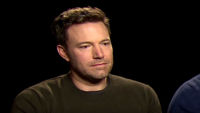

In [8]:
imgPIL_Resize=imgPIL.copy()
imgPIL_Resize.thumbnail ((200, 200))
print(imgPIL_Resize)
imgPIL_Resize


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x260 at 0x7F6144FC5588>


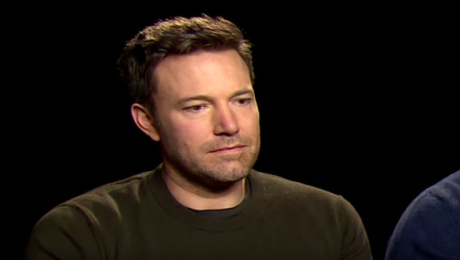

In [9]:
#Original
print(imgPIL)
imgPIL

#### Convertir a escala de grises

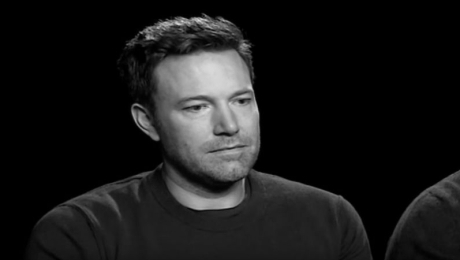

In [10]:
imgPIL_Gray=imgPIL.copy()

imgPIL_Gray = imgPIL_Gray.convert('L')
imgPIL_Gray.save('Ben_elgris.png') #Guardando para mas adelante
imgPIL_Gray


In [11]:
print(imgPIL)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x260 at 0x7F6144FC5588>


#### Ahora vamos a recortarla imagén

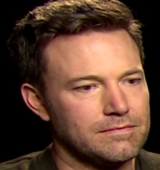

In [12]:
# (ancho izquierdo, alto, ancho derecho, bajo)
caja = (110, 20, 270, 190)

imgPIL_cut=imgPIL.copy()

region = imgPIL_cut.crop(caja)  


# Guarda la imagen obtenida con el formato JPG.
region.save("region.jpg")

# Guarda la imagen obtenida con el formato PNG.
region.save("region.png")

region

#### openCV también es una libreria que nos brinda muchas herramientas. 
    A continuación la usaremos para normalizar

In [13]:
norm_img = np.zeros((460, 260))

norm_img = cv2.normalize(imgCV, norm_img, 0, 255, cv2.NORM_MINMAX)



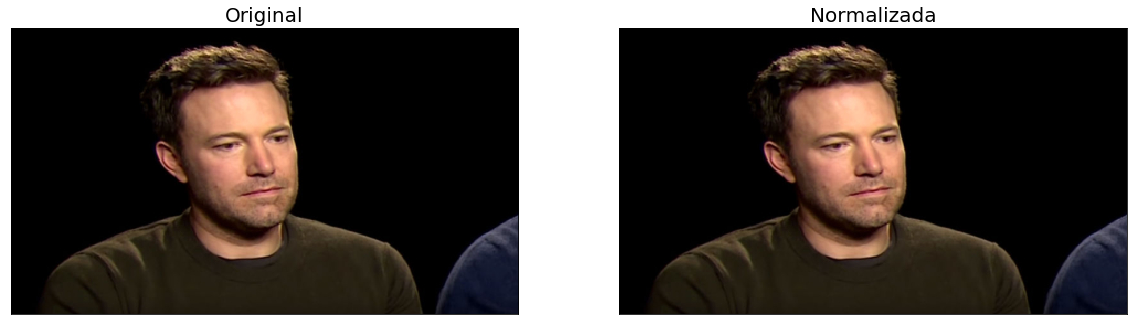

In [14]:

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)

plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(imgPIL), plt.title('Normalizada',fontsize=20)
plt.xticks([]), plt.yticks([])


plt.show()

(<matplotlib.image.AxesImage at 0x7f610095d0b8>, Text(0.5, 1.0, 'Original'))

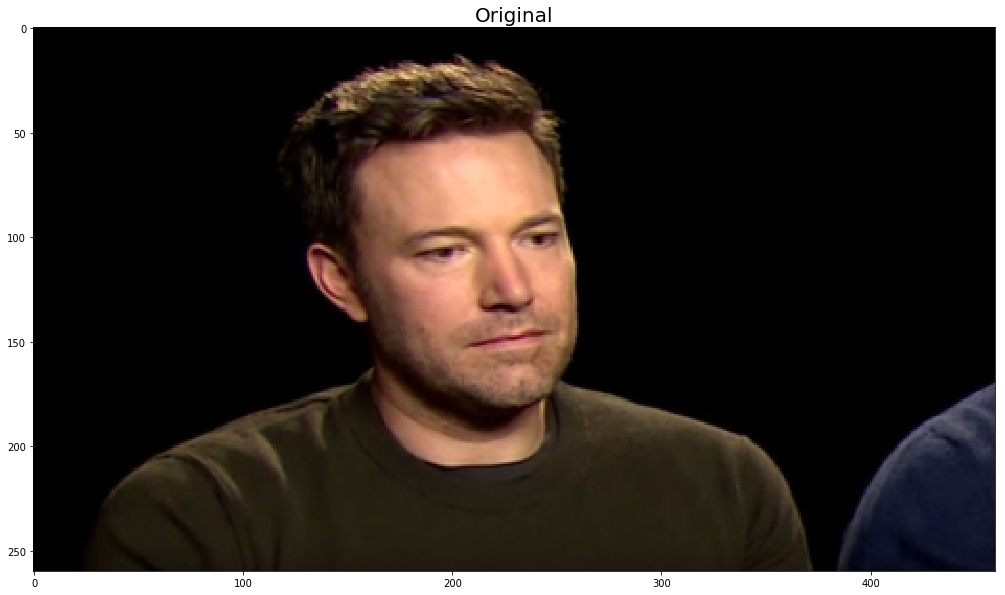

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)

(<matplotlib.image.AxesImage at 0x7f6100932c88>, Text(0.5, 1.0, 'Normalizada'))

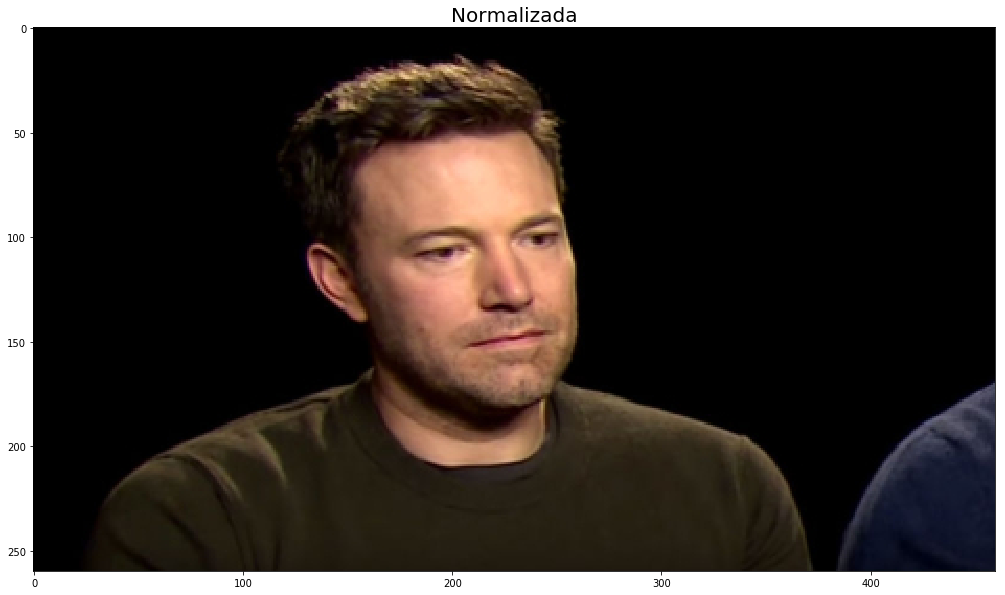

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(imgPIL), plt.title('Normalizada',fontsize=20)

#### Bluring (openCV)
    Con esto removeremos el famoso "image noise"

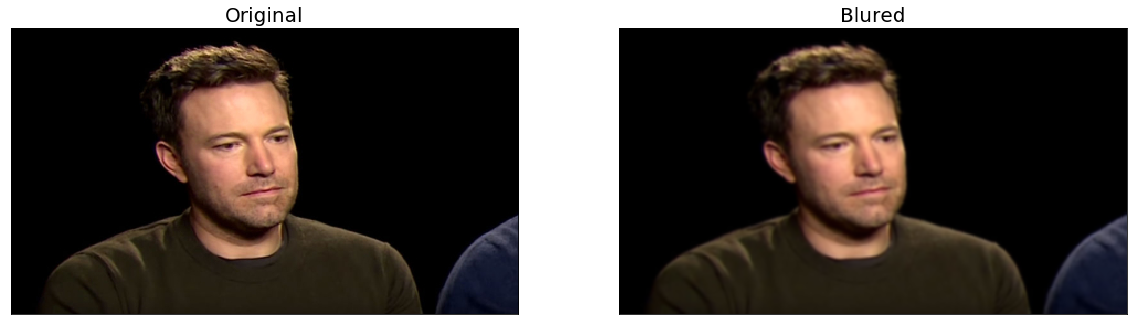

In [17]:


imgMATPLOT_noisefree =cv2.GaussianBlur(imgMATPLOT, (5, 5), 0)





plt.figure(figsize=(20,20))
plt.subplot(1,2,1)

plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(imgMATPLOT_noisefree), plt.title('Blured',fontsize=20)
plt.xticks([]), plt.yticks([])


plt.show()


(<matplotlib.image.AxesImage at 0x7f6100071588>, Text(0.5, 1.0, 'Original'))

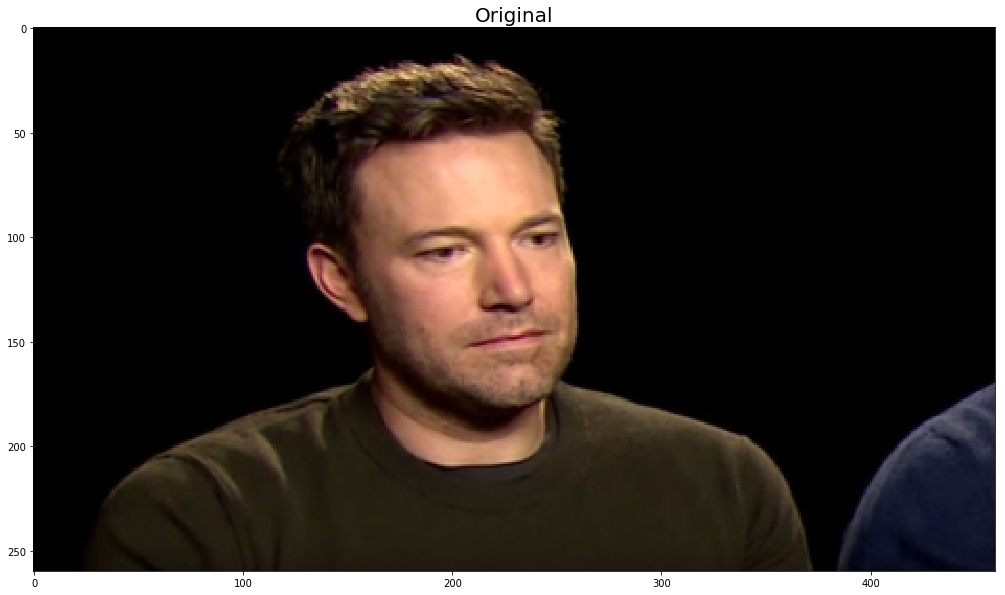

In [18]:
plt.figure(figsize=(20,10))

plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)


(<matplotlib.image.AxesImage at 0x7f60f8f86fd0>, Text(0.5, 1.0, 'Blured'))

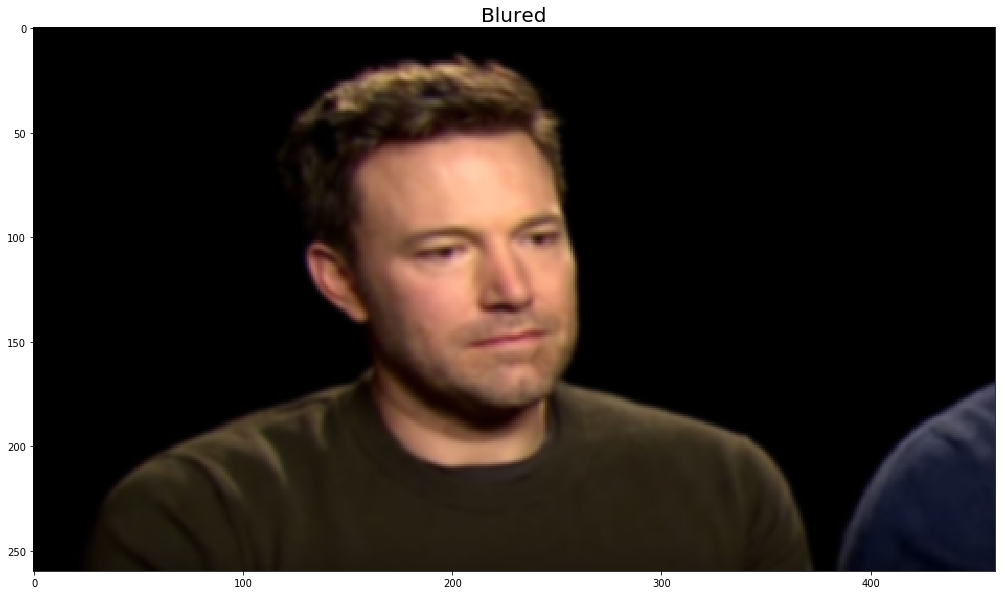

In [19]:
plt.figure(figsize=(20,10))

plt.imshow(imgMATPLOT_noisefree), plt.title('Blured',fontsize=20)

#### Seguiremos con la etapa de segmentación
    Se acuerdan de nuestra imagén en escala de grises, pues carguemola.

In [20]:
#Pongamos nuestra en escala de grises y después apliquemole bluring

imgMATPLOT_ctv=cv2.cvtColor(imgMATPLOT, cv2.COLOR_RGB2GRAY)
imgMATPLOT_noisefree_ctv =cv2.GaussianBlur(imgMATPLOT_ctv, (5, 5), 0)


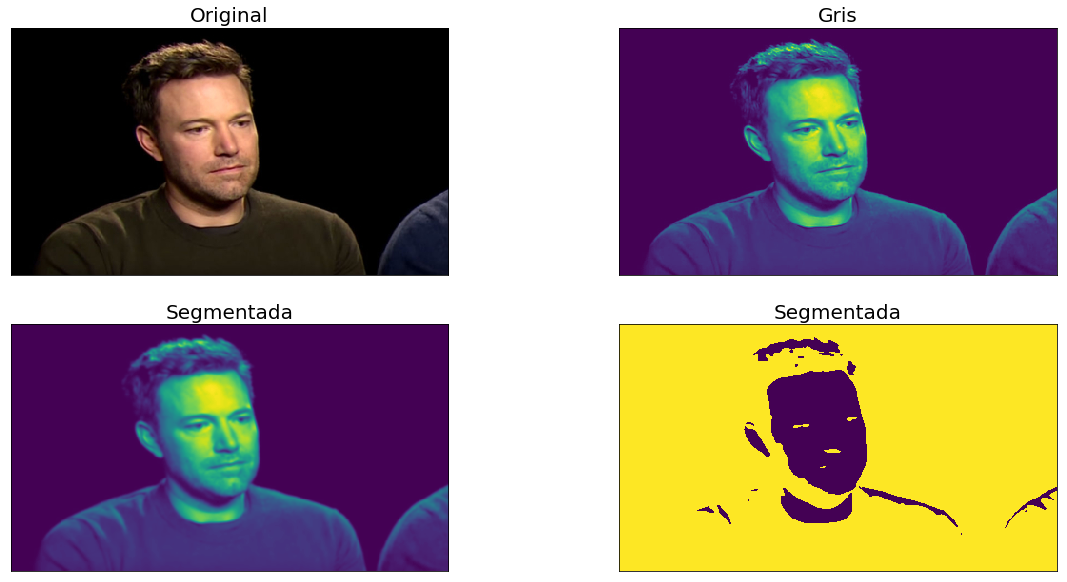

In [21]:

ret, thresh = cv2.threshold(imgMATPLOT_noisefree_ctv, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(imgMATPLOT_ctv), plt.title('Gris',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(imgMATPLOT_noisefree_ctv), plt.title('Segmentada',fontsize=20)
plt.xticks([]), plt.yticks([])


plt.subplot(2,2,4)
plt.imshow(thresh), plt.title('Segmentada',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.show()



Ahora segementaremos el fondo o background

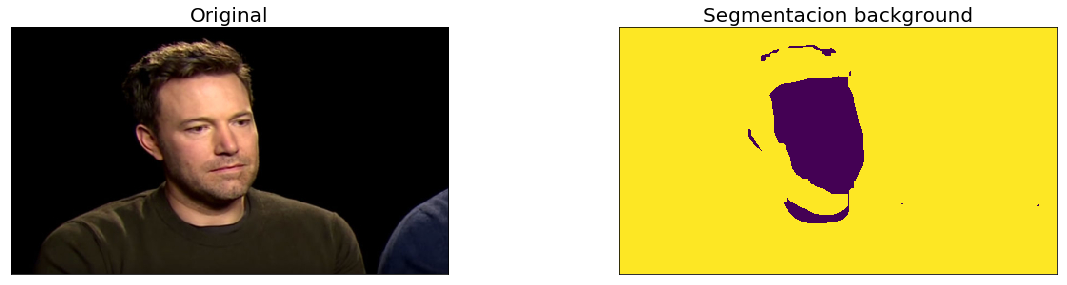

In [22]:

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)


sure_bg = cv2.dilate(opening, kernel, iterations=3)




plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.imshow(imgMATPLOT), plt.title('Original',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(sure_bg), plt.title('Segmentacion background',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.show()


#### Marcadores de contorno

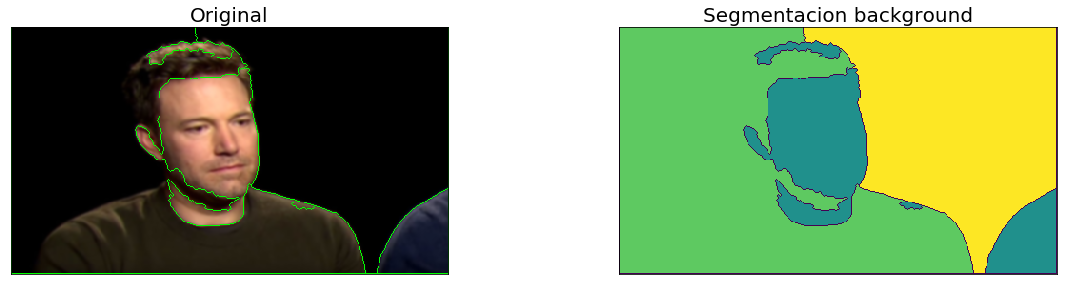

In [23]:

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(imgMATPLOT, markers)
imgMATPLOT_noisefree[markers == -1] = [0, 255, 0]


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.imshow(imgMATPLOT_noisefree), plt.title('Original',fontsize=20)

plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(markers ), plt.title('Segmentacion background',fontsize=20)
plt.xticks([]), plt.yticks([])

plt.show()

##### BONUS: encontremos la cara y ojos con openCV

Utilizamos filtros de cacadas de Haar-> Usados frecuentemente para la detección de rostro

In [ ]:


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces_detected = face_cascade.detectMultiScale(imgMATPLOT, scaleFactor=1.1, minNeighbors=5)


In [ ]:
(x, y, w, h) = faces_detected[0] 
cv2.rectangle(imgMATPLOT, (x, y), (x + w, y + h), (0, 0, 255), 1); 


eyes = eyes_cascade.detectMultiScale(imgMATPLOT[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(imgMATPLOT, (x+ex, y+ey), (x+ex+ew, y+ey+eh), 
                  (255, 255, 255), 1)
    
    



cv2.imshow('',imgMATPLOT)
cv2.waitKey(0)
cv2.destroyAllWindows () 